Dataset: https://github.com/dsrscientist/dataset1/blob/master/student_marks.csv

1. Create a table named studmarks in Mysql . Choose the column name and its datatypes accordingly to the students_marks .csv in github

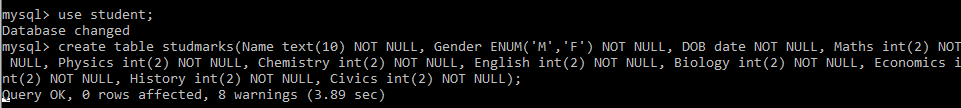

In [171]:
from IPython.display import Image
Image(filename='Query1.png')

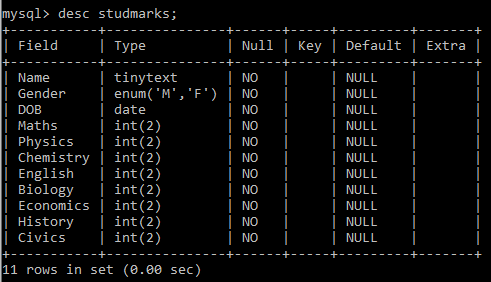

In [176]:
Image(filename='Query 2.png')

2.Load the data of students marks.csv into mysql database by load local infile command . 

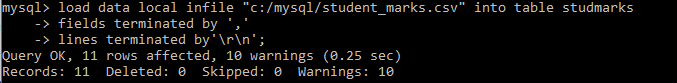

In [177]:
Image(filename='Query 3.png')

<b>Importing necessary files</b>

In [178]:
!pip install mysql-connector-python

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import mysql.connector
import pandas as pd

In [3]:
# Connecting to server

con=mysql.connector.connect(host="localhost", port=3306, user="root",password="Sanketp997%",database="Student")

# Reading data
data=pd.read_sql_query("Select * from studmarks",con)
data.head()

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,1988-04-05,55,45,56,87,21,52,89,65
1,Suresh,M,1987-05-04,75,96,78,64,90,61,58,2
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
3,Jessica,F,1989-08-12,78,96,86,63,54,89,75,45
4,Jennifer,F,1989-09-02,58,96,78,46,96,77,83,53


In [4]:
data.tail()

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
5,Annu,F,1988-04-05,45,87,52,89,55,89,87,52
6,pooja,F,1987-05-04,55,64,61,58,75,58,64,61
7,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87
8,Farha,F,1990-08-12,55,63,89,75,78,75,63,89
9,Mukesh,M,1989-09-02,96,46,77,83,58,83,46,77


In [6]:
print(data.dtypes)

Name         object
Gender       object
DOB          object
Maths         int64
Physics       int64
Chemistry     int64
English       int64
Biology       int64
Economics     int64
History       int64
Civics        int64
dtype: object


<b>Observation:</b>
<li> There are 11 attributes, out of which 8 attributes are of int datatype and 3 attributes are of object datatype.</li>

In [167]:
# Dropping the missing values
data.dropna()
data.count()

Name         10
Gender       10
DOB          10
Maths        10
Physics      10
Chemistry    10
English      10
Biology      10
Economics    10
History      10
Civics       10
dtype: int64

In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
Name         10 non-null object
Gender       10 non-null object
DOB          10 non-null object
Maths        10 non-null int64
Physics      10 non-null int64
Chemistry    10 non-null int64
English      10 non-null int64
Biology      10 non-null int64
Economics    10 non-null int64
History      10 non-null int64
Civics       10 non-null int64
dtypes: int64(8), object(3)
memory usage: 960.0+ bytes


In [168]:
data.isnull().sum()

Name         0
Gender       0
DOB          0
Maths        0
Physics      0
Chemistry    0
English      0
Biology      0
Economics    0
History      0
Civics       0
dtype: int64

<b>Observation:</b>
There is no missing values in the dataset.

In [87]:
data.shape

(10, 11)

<b>Observation:</b>
<li> There are 10 rows and 11 columns in the dataset.</li>

In [110]:
group=data.groupby(["DOB","Gender"])
group.first()

Name  Maths  Physics  Chemistry  English  Biology  \
DOB        Gender                                                          
1987-05-04 F          pooja     55       64         61       58       75   
           M         Suresh     75       96         78       64       90   
1988-04-05 F           Annu     45       87         52       89       55   
           M           John     55       45         56       87       21   
1989-05-25 M         Ramesh     25       54         89       76       95   
1989-08-12 F        Jessica     78       96         86       63       54   
1989-09-02 F       Jennifer     58       96         78       46       96   
           M         Mukesh     96       46         77       83       58   
1990-08-12 F          Farha     55       63         89       75       78   

                   Economics  History  Civics  
DOB        Gender                              
1987-05-04 F              58       64      61  
           M              61       58       2  
1988-04-05 F              89       87      52  
           M              52       89      65  
1989-05-25 M              87       56      74  
1989-08-12 F              89       75      45  
1989-09-02 F              77       83      53  
           M              83       46      77  
1990-08-12 F              75       63      89

<b>Observations:</b>
<li> There are two people (pooja, suresh) who born in 1987.</li>
<li> There are two people(Annu,John) who born in 1988.</li>
<li> There are four people(Ramesh,Jessica,Jennifier,Mukesh) who born in 1989.</li>
<li> There is only one people(Farha) who born in 1990.</li>

There are 8 subjects. Now, we will see who has got highest marks in a particular subject.

In [132]:
m1=data.groupby(["Name","Maths"])
#set benchmark score of >90
m1= data[data["Maths"]>90]
m1

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
9,Mukesh,M,1989-09-02,96,46,77,83,58,83,46,77


<b>Observation:</b>
Mukesh has got highest marks(96) in Maths.

In [146]:
p1=data.groupby(["Name","Physics"])
#set benchmark score of >90
p1= data[data["Physics"]>90]
p1

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
1,Suresh,M,1987-05-04,75,96,78,64,90,61,58,2
3,Jessica,F,1989-08-12,78,96,86,63,54,89,75,45
4,Jennifer,F,1989-09-02,58,96,78,46,96,77,83,53


<b>Observation:</b>
There are three people(Suresh,Jessica,Jennifier) who have got highest marks(96) in Physics.

In [145]:
c1=data.groupby(["Name","Chemistry"])
#set benchmark score of >87
c1= data[data["Chemistry"]>87]
c1

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
8,Farha,F,1990-08-12,55,63,89,75,78,75,63,89


<b>Observation:</b>
There are two people(Ramesh,Farha) who have got highest marks(89) in Chemistry.

In [147]:
e1=data.groupby(["Name","English"])
#set benchmark score of >87
e1= data[data["English"]>87]
e1

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
5,Annu,F,1988-04-05,45,87,52,89,55,89,87,52


<b>Observation:</b>
There is only one person(Annu) who has got Highest marks(89) in English.

In [149]:
b1=data.groupby(["Name","Biology"])
#set benchmark score of >95
b1= data[data["Biology"]>95]
b1

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
4,Jennifer,F,1989-09-02,58,96,78,46,96,77,83,53


<b>Observation:</b>
There is only one person(Jennifier) who has got Highest marks(96) in Biology.

In [152]:
Ec1=data.groupby(["Name","Economics"])
#set benchmark score of >87
Ec1= data[data["Economics"]>87]
Ec1

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
3,Jessica,F,1989-08-12,78,96,86,63,54,89,75,45
5,Annu,F,1988-04-05,45,87,52,89,55,89,87,52


<b>Observation:</b>
There are two people(Jessica,Annu) who has got Highest marks(89) in Economics.

In [153]:
h1=data.groupby(["Name","History"])
#set benchmark score of >87
h1= data[data["History"]>87]
h1

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,1988-04-05,55,45,56,87,21,52,89,65


<b>Observation:</b>
There is only one person(John) who has got Highest marks(89) in History.

In [154]:
cv1=data.groupby(["Name","Civics"])
#set benchmark score of >87
cv1= data[data["Civics"]>87]
cv1

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
8,Farha,F,1990-08-12,55,63,89,75,78,75,63,89


<b>Observation:</b>
There is only one person(Farha) who has got Highest marks(89) in Civics.

In [179]:
data.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


<b>Obseration:</b>
In some attributes, mean is greater than median.

# EDA

<b>Univariate Analysis</b>

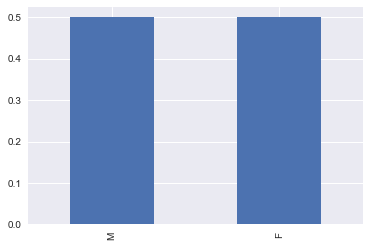

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
data["Gender"].value_counts(normalize=True).plot(kind="bar")

<b>Observation:</b>
From the above visualization, we can see that Number of females and Number of males are equal.

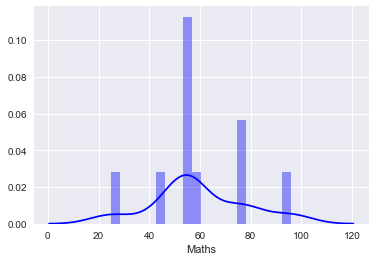

In [24]:
import warnings
warnings.filterwarnings("ignore")
sns.distplot(data["Maths"],color='b',bins=20)

<b>Observation:</b>
The average score of Maths is ~60.

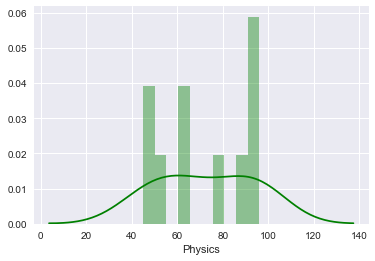

In [32]:
sns.distplot(data["Physics"],color='g',bins=10)

<b>Observation:</b>
The average score of Physics is ~70.

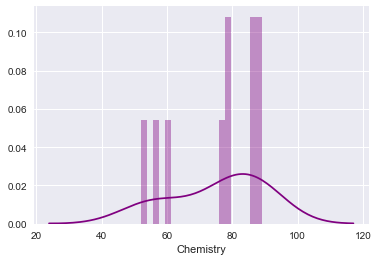

In [37]:
sns.distplot(data["Chemistry"],color='purple',bins=20)

<b>Observation:</b>
The average score of Chemistry is ~85.

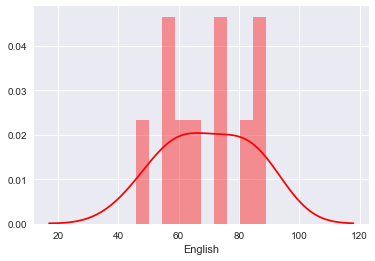

In [39]:
sns.distplot(data["English"],color='r',bins=10)

<b>Observation:</b>
The average score of English is ~68.

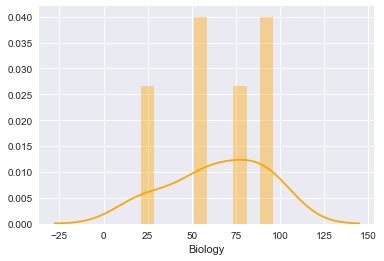

In [44]:
sns.distplot(data["Biology"],color='orange',bins=10)

<b>Observation:</b>
The average score of Biology is ~75.

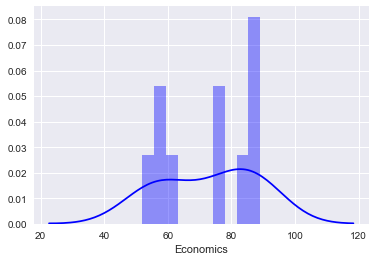

In [53]:
sns.distplot(data["Economics"],color='blue',bins=10)

<b>Observation:</b>
The average score of Economics is ~83.

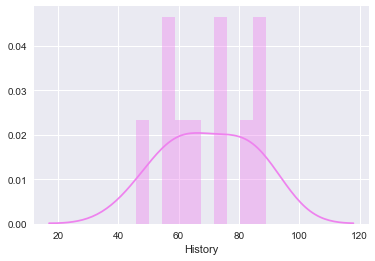

In [54]:
sns.distplot(data["History"],color='violet',bins=10)

<b>Observation:</b>
The average score of History is ~70.

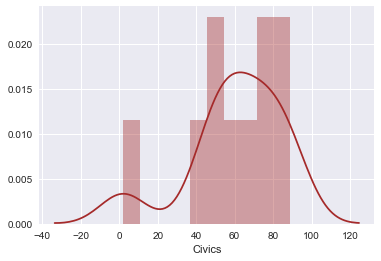

In [55]:
sns.distplot(data["Civics"],color='brown',bins=10)

<b>Observation:</b>
The average score of Civics is ~65.

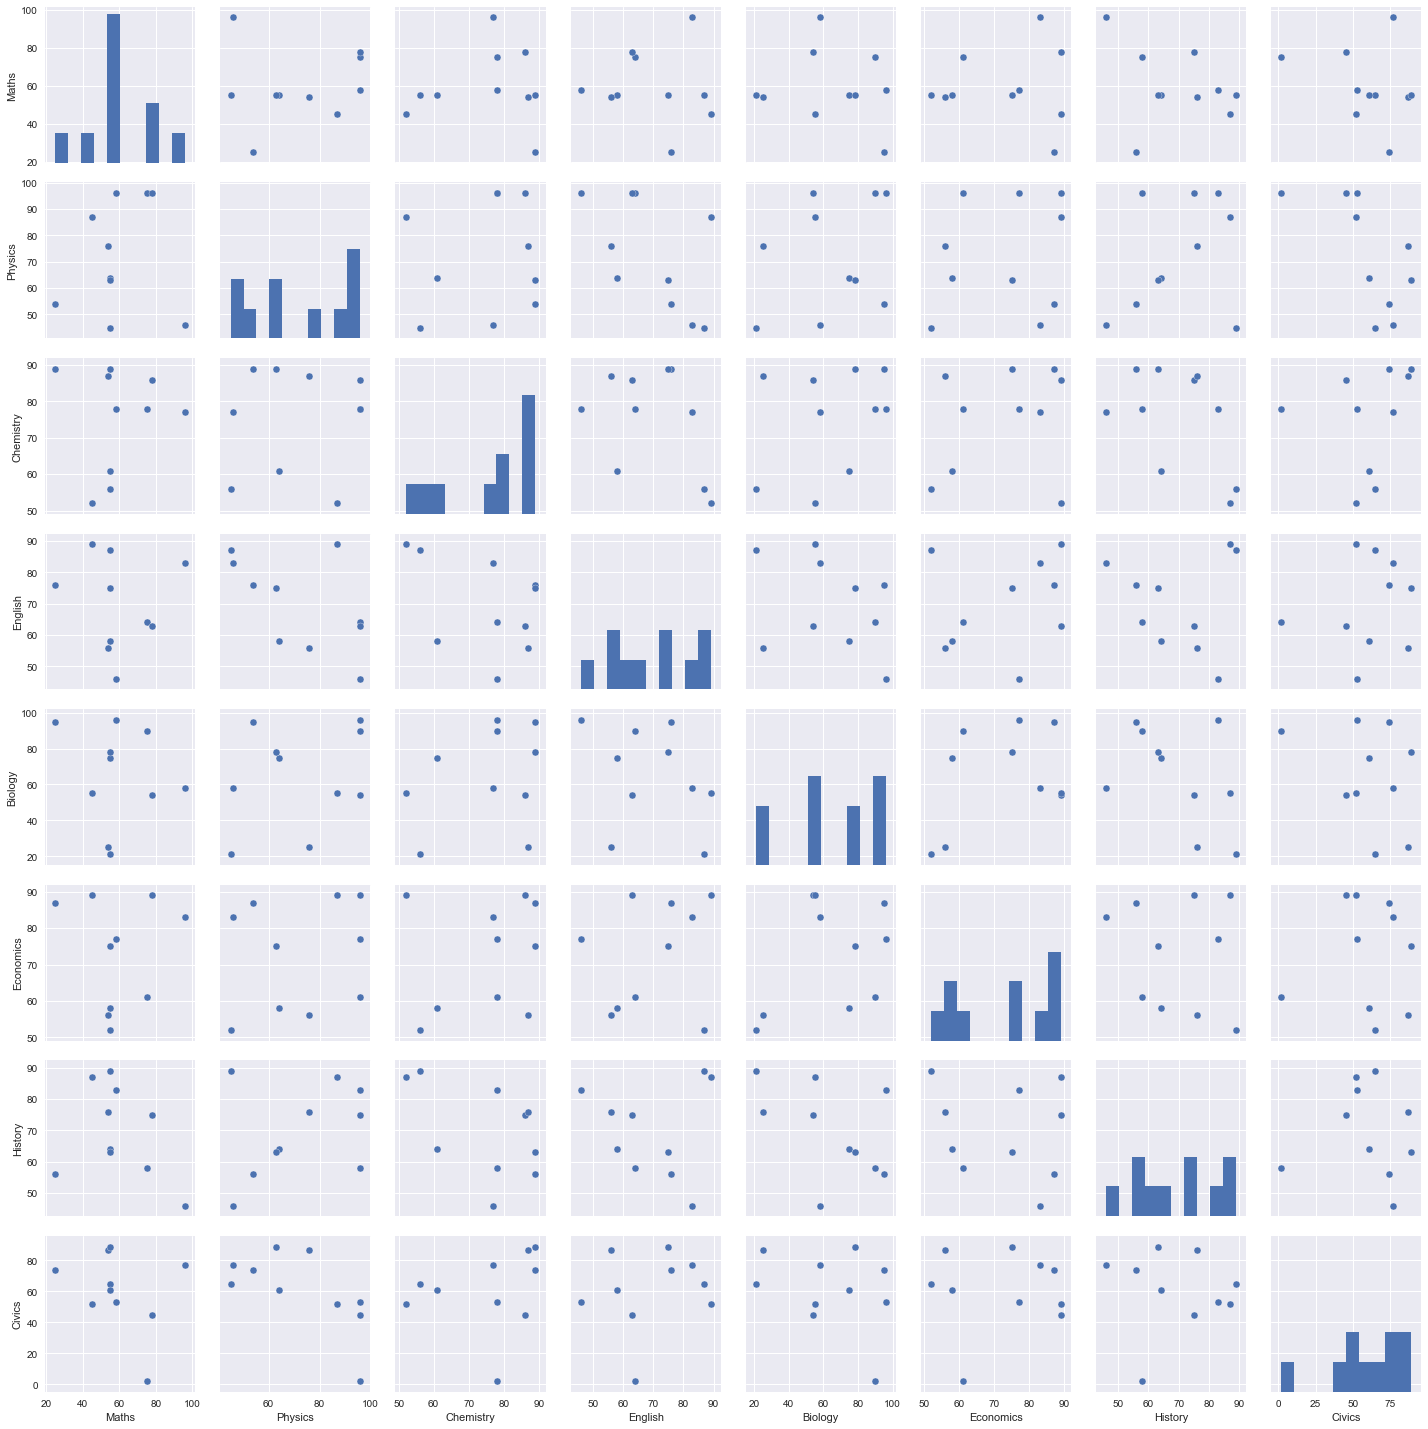

In [112]:
sns.pairplot(data)

<b>Bi-Variate Analysis</b>

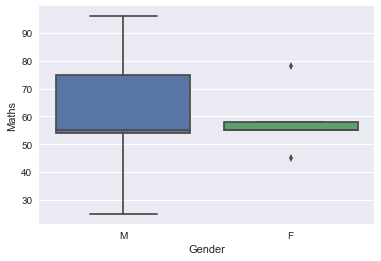

In [160]:
plt.figure(figsize=[6,4])
sns.boxplot(x=data["Gender"],y=data["Maths"])

<b>Observation:</b>
There is outlier in Female with respect to maths.

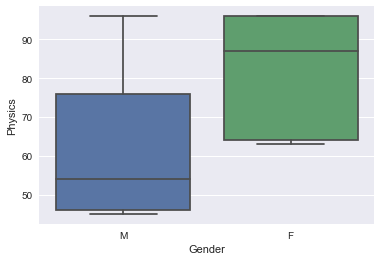

In [161]:
plt.figure(figsize=[6,4])
sns.boxplot(x=data["Gender"],y=data["Physics"])

<b>Observation:</b>
There is no outlier.

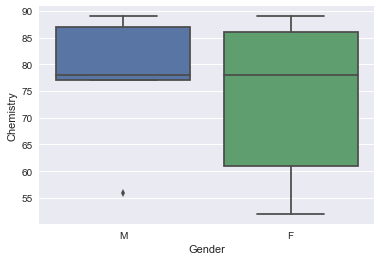

In [162]:
plt.figure(figsize=[6,4])
sns.boxplot(x=data["Gender"],y=data["Chemistry"])

<b>Observation:</b>
There is outlier in Male with respect to Chemistry.

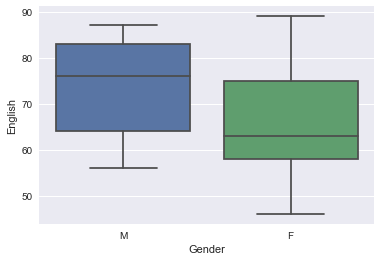

In [163]:
plt.figure(figsize=[6,4])
sns.boxplot(x=data["Gender"],y=data["English"])

<b>Observation:</b>
There is no outlier.

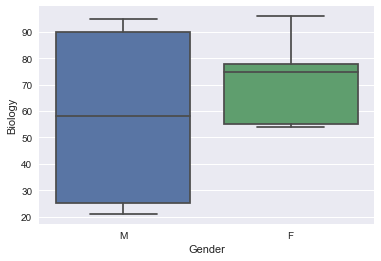

In [164]:
plt.figure(figsize=[6,4])
sns.boxplot(x=data["Gender"],y=data["Biology"])

<b>Observation:</b>
There is no outlier.

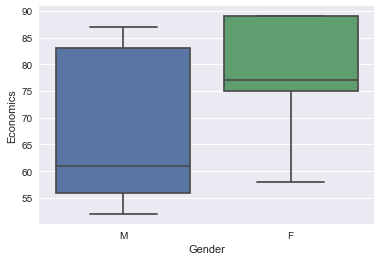

In [119]:
plt.figure(figsize=[6,4])
sns.boxplot(x=data["Gender"],y=data["Economics"])

<b>Observation:</b>
There is no outlier.

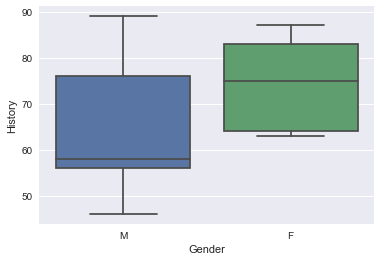

In [157]:
plt.figure(figsize=[6,4])
sns.boxplot(x=data["Gender"],y=data["History"])

<b>Observation:</b>
There is no outlier.

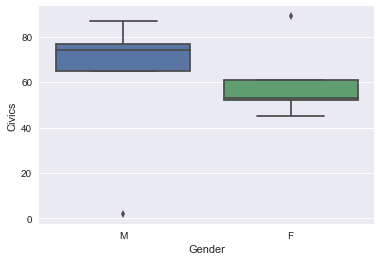

In [159]:
plt.figure(figsize=[6,4])
sns.boxplot(x=data["Gender"],y=data["Civics"])

<b>Observation:</b>
There are outliers in Male as well as in Female with respect to Civics.

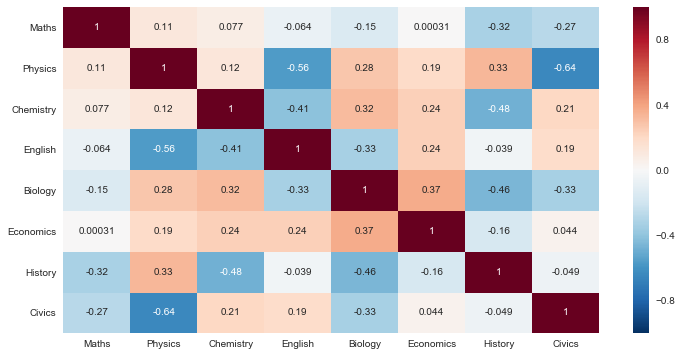

In [123]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True)

<b>Observation:</b>
Biology and Economics are highly correlated.<br>
There is multicollinearity with Chemistry, English with Economics.